<h1> Pendahuluan </h1>

Negara-negara di benua Eropa memiliki perkembangan yang sangat pesat, mulai dari sektor pendidikan, penelitian, ekonomi, olahraga dan lain-lain. Negara di Eropa memiliki beberapa kondisi serta keadaan yang dapat dijadikan sebagai acuan negara di benua Asia-Oceania, Amerika dan Afrika. Negara eropa memiliki 44 negara berdasarkan situs website https://www.worldometers.info/geography/how-many-countries-in-europe/, akan tetapi pada analisa ini hanya menggunakan data dari 32 negara. Data tersebut memiliki beberapa variabel antara lain, jumlah pendapatan negara (GDP), jumlah populasi tiap negara, kondisi kesehatan yang dibagi menjadi 5 keadaan yaitu; Very Good, Good, Fair, Bad dan Very Bad, variabel kebahagiaan dalam kehidupan kerja yang dibagi menjadi 3 keadaan yaitu; High, Medium dan Low, lalu variabel kebahagiaan dalam kehidupan di tiap negara yang dibagi menjadi 3 keadaan yaitu; High, Medium dan Low, di data ini juga terdapat variabel lain seperti rata-rata pemasukan, jumlah populasi pengangguran dan jumlah populasi remaja.

<h1> Daftar Isi: </h1>

1. Pendahuluan
2. Daftar Isi
3. Sumber Data
4. Import library
5. Eksplorasi Data:
   - Pendapatan Negara (GDP)
   - Populasi Penduduk
   - Kondisi Kesehatan Penduduk 
   - Kebahagiaan dalam Bekerja 
   - Kebahagiaan Hidup
   - Rata-rata Pendapatan 
   - Penduduk Belum Bekerja
   - Populasi Remaja
6. Visualisasi Data
7. Pemodelan Data
8. Kesimpulan
    

<h1> Sumber Data </h1>

Sumber data untuk analisa ini didapat dari website https://www.kaggle.com/roshansharma/europe-datasets

<h1> Import Library</h1>

Mengimpor library yang digunakan

In [82]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

<h1> Data Exploration </h1>

Mengimpor dataset (europe.csv) untuk digunakan dan diubah ke bentuk dataframe

In [83]:
#Import Dataset
df_europe=pd.read_csv("europe.csv")
df_europe.head()

,country,gdp,prct_job_satis_high,prct_job_satis_med,prct_job_satis_low,prct_life_satis_high,prct_life_satis_med,prct_life_satis_low,median_income,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,unemp_rate,avg_hrs_worked,total_pop,prct_yng_adt_pop
0,Cyprus,18490.2,28.2,51.8,20.0,14.2,48.8,37.0,16173,44.1,34.6,16.8,3.8,0.7,13.0,39.2,840407,23.322628
1,Latvia,25037.7,25.8,56.9,17.3,12.6,56.6,30.8,9257,5.1,42.1,37.2,12.6,3.0,9.6,38.7,2070371,20.442858
2,Lithuania,38849.4,29.6,55.4,15.0,18.8,53.3,27.9,9364,6.6,36.8,39.6,14.2,2.7,7.9,38.5,3043429,20.526781
3,Luxembourg,53303.0,30.4,55.1,14.5,25.7,59.5,14.8,28663,23.4,45.8,21.2,7.8,1.8,6.3,37.5,512353,18.940652
4,Hungary,113903.8,23.0,55.7,21.3,11.3,50.2,38.5,8267,17.6,42.0,27.1,10.4,2.8,5.1,39.7,9937628,18.345122


Mengubah nama tiap kolom agar lebih jelas

In [85]:
df_europe.columns

Index(['Country', 'GDP(US$)', 'High Job Satisfication(%)',
       'Medium Job Satisfication(%)', 'Low Job Satisfication(%)',
       'High Life Satisfication(%)', 'Medium Life Satisfication(%)',
       'Low Life Satisfication(%)', 'Median Income', 'Very Good Health(%)',
       'Good Health(%)', 'Fair Health(%)', 'Bad Health(%)',
       'Very Bad Health(%)', 'Unemployment Rate(%)',
       'Average Hours Worked(Hours)', 'Total Population',
       'Young Adult Population(%)'],
      dtype='object')

In [86]:
#Rename Columns in The Dataset
columns=["Country", "GDP(US$)", "High Job Satisfication(%)", "Medium Job Satisfication(%)", "Low Job Satisfication(%)", "High Life Satisfication(%)", "Medium Life Satisfication(%)", "Low Life Satisfication(%)", "Median Income", "Very Good Health(%)", "Good Health(%)", "Fair Health(%)", "Bad Health(%)",
        "Very Bad Health(%)", "Unemployment Rate(%)", "Average Hours Worked(Hours)", "Total Population", "Young Adult Population(%)"]
df_europe.columns=columns

Tampilan data setelah mengubah nama kolom

In [87]:
df_europe.head()

,Country,GDP(US$),High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),Median Income,Very Good Health(%),Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%),Unemployment Rate(%),Average Hours Worked(Hours),Total Population,Young Adult Population(%)
0,Cyprus,18490.2,28.2,51.8,20.0,14.2,48.8,37.0,16173,44.1,34.6,16.8,3.8,0.7,13.0,39.2,840407,23.322628
1,Latvia,25037.7,25.8,56.9,17.3,12.6,56.6,30.8,9257,5.1,42.1,37.2,12.6,3.0,9.6,38.7,2070371,20.442858
2,Lithuania,38849.4,29.6,55.4,15.0,18.8,53.3,27.9,9364,6.6,36.8,39.6,14.2,2.7,7.9,38.5,3043429,20.526781
3,Luxembourg,53303.0,30.4,55.1,14.5,25.7,59.5,14.8,28663,23.4,45.8,21.2,7.8,1.8,6.3,37.5,512353,18.940652
4,Hungary,113903.8,23.0,55.7,21.3,11.3,50.2,38.5,8267,17.6,42.0,27.1,10.4,2.8,5.1,39.7,9937628,18.345122


Mengetahui info dari data 

In [6]:
#Data Info
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       32 non-null     object 
 1   GDP(US$)                      32 non-null     float64
 2   High Job Satisfication(%)     32 non-null     float64
 3   Medium Job Satisfication(%)   32 non-null     float64
 4   Low Job Satisfication(%)      32 non-null     float64
 5   High Life Satisfication(%)    32 non-null     float64
 6   Medium Life Satisfication(%)  32 non-null     float64
 7   Low Life Satisfication(%)     32 non-null     float64
 8   Median Income                 32 non-null     int64  
 9   Very Good Health(%)           32 non-null     float64
 10  Good Health(%)                32 non-null     float64
 11  Fair Health(%)                32 non-null     float64
 12  Bad Health(%)                 32 non-null     float64
 13  Very Ba

<h3> Pendapatan Negara (GDP) </h3>

In [7]:
#GDP tiap Negara
gdp= df_europe[['Country', 'GDP(US$)']]
gdp= gdp.sort_values(by='GDP(US$)', ascending=False, ignore_index=True)
gdp.head(10)

,Country,GDP(US$)
0,Germany,3159750.0
1,United Kingdom,2403382.6
2,France,2228568.0
3,Italy,1689824.0
4,Spain,1118743.0
5,Turkey,780224.9
6,Netherlands,708337.0
7,Switzerland,605753.7
8,Sweden,463147.5
9,Poland,426547.5


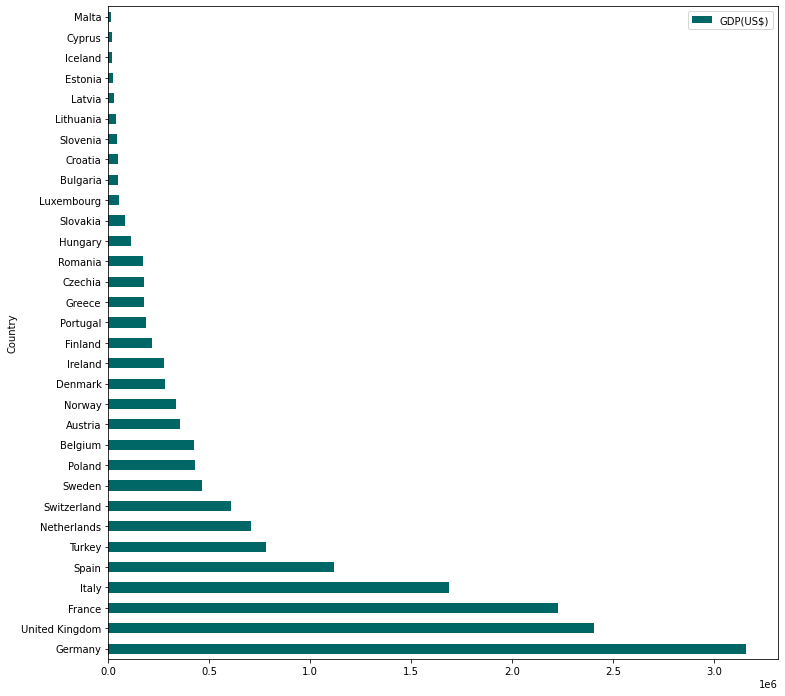

In [8]:
#Visualiasi GDP tiap negara menggunakan diagram batang
gdp.plot.barh(x='Country', y='GDP(US$)', figsize=(12,12), color='#006666')

Dari hasil analisa data pendapatan negara (GDP) diperoleh informasi bahwa negara Germany memiliki pendapatan negara terbanyak sekitar 3.159.750 US$ dibanding negara-negara lain di Eropa

<h3> Populasi Penduduk</h3>

In [9]:
#Populasi tiap negara
population= df_europe[['Country', 'Total Population']]
population=population.sort_values(by='Total Population', ascending=False, ignore_index=True)
population.head(10)

,Country,Total Population
0,Germany,80219695
1,France,64933400
2,United Kingdom,63182180
3,Italy,59433744
4,Spain,46815910
5,Poland,38044565
6,Romania,20121641
7,Netherlands,16655799
8,Belgium,11000638
9,Greece,10816286


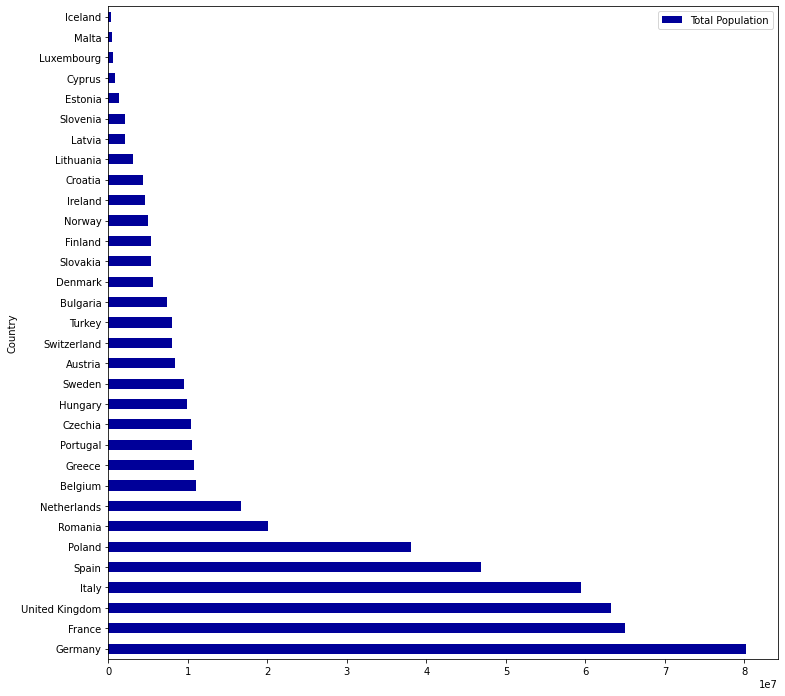

In [10]:
#Visualisasi populasi tiap negara menggunakan diagram batang
population.plot.barh(x='Country', y='Total Population', figsize=(12,12), color='#000099')

Dari hasil analisa data populasi negara diperoleh informasi bahwa negara Germany memiliki populasi negara terbanyak sekitar 80.219.695 penduduk dibanding negara-negara lain di Eropa

<h3> Kondisi Kesehatan Penduduk </h3>

In [11]:
#Kondisi kesehatan penduduk tiap negara
health=df_europe[['Country','Very Good Health(%)',
       'Good Health(%)', 'Fair Health(%)', 'Bad Health(%)',
       'Very Bad Health(%)']]
health.head()

,Country,Very Good Health(%),Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%)
0,Cyprus,44.1,34.6,16.8,3.8,0.7
1,Latvia,5.1,42.1,37.2,12.6,3.0
2,Lithuania,6.6,36.8,39.6,14.2,2.7
3,Luxembourg,23.4,45.8,21.2,7.8,1.8
4,Hungary,17.6,42.0,27.1,10.4,2.8


Negara dengan kondisi kesehatan penduduk yang sangat bagus

In [12]:
#Kondisi kesehatan penduduk yang sangat bagus
verygood=health[['Country','Very Good Health(%)']]
verygood=verygood.sort_values(by='Very Good Health(%)', ascending=False, ignore_index=True)
verygood.head(10)

,Country,Very Good Health(%)
0,Greece,45.0
1,Cyprus,44.1
2,Ireland,41.7
3,Iceland,38.3
4,Switzerland,33.2
5,Austria,31.9
6,United Kingdom,30.8
7,Belgium,29.8
8,Sweden,29.0
9,Norway,28.8


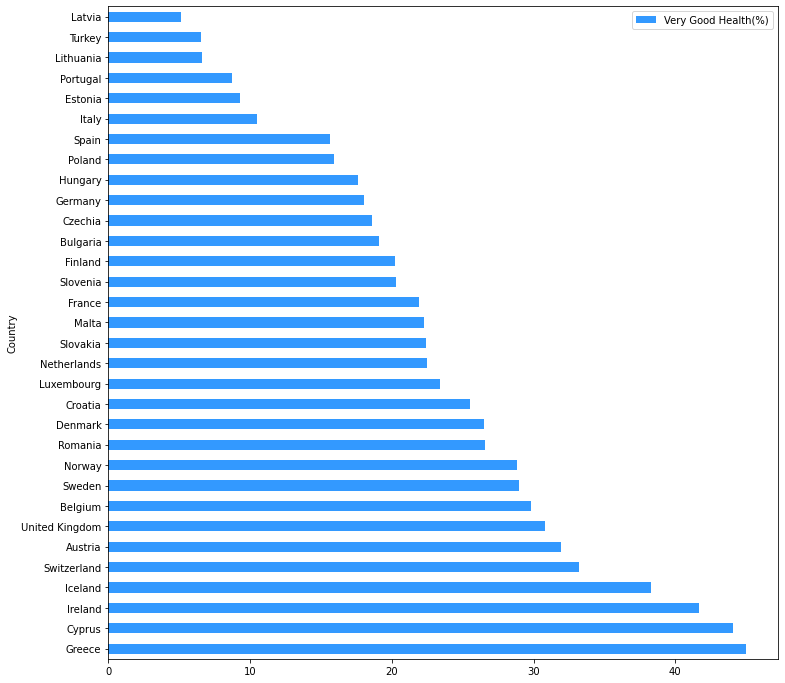

In [120]:
#Visualisasi negara dengan kondisi kesehatan yang sangat bagus dengan menggunakan diagram batang
verygood.plot.barh(x='Country', y='Very Good Health(%)', figsize=(12,12), color='#3399FF')

Dari hasil analisa data negara yang memiliki kondisi kesehatan yang sangat bagus, diperoleh informasi bahwa negara Greece memiliki presentase 45% penduduk yang memiliki kondisi kesehatan yang sangat bagus.

Negara dengan kondisi kesehatan penduduk yang bagus

In [14]:
#Kondisi kesehatan penduduk yang bagus
good=health[['Country','Good Health(%)']]
good=good.sort_values(by='Good Health(%)', ascending=False, ignore_index=True)
good.head(10)

,Country,Good Health(%)
0,Turkey,62.3
1,Italy,60.4
2,Spain,56.9
3,Netherlands,53.4
4,Malta,50.6
5,Finland,50.1
6,Norway,48.4
7,Germany,47.2
8,Bulgaria,46.7
9,Sweden,46.0


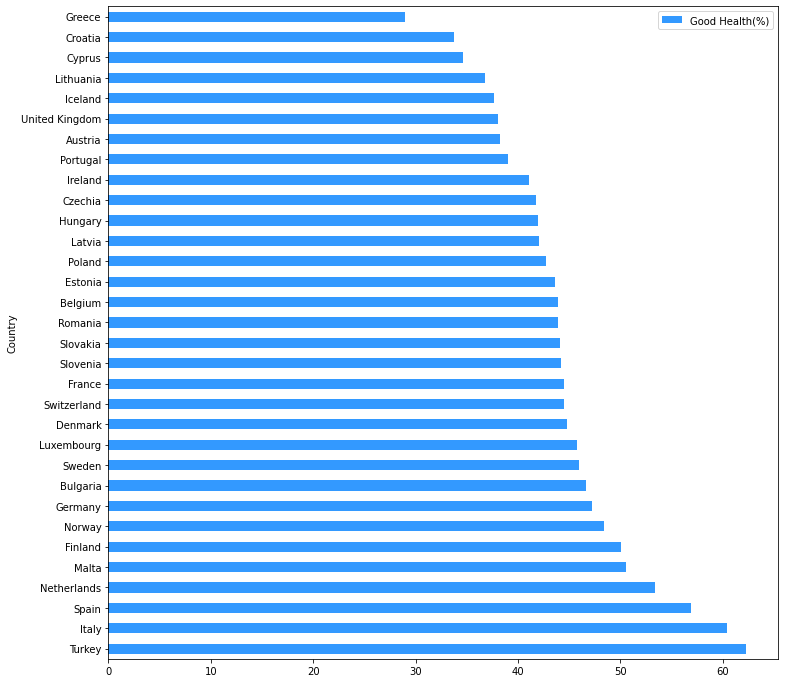

In [15]:
#Visualisasi negara dengan kondisi kesehatan yang bagus dengan menggunakan diagram batang
good.plot.barh(x='Country', y='Good Health(%)', figsize=(12,12), color='#3399FF')

Dari hasil analisa data negara yang memiliki kondisi kesehatan yang bagus, diperoleh informasi bahwa negara Turkey memiliki presentase 62.3% penduduk yang memiliki kondisi kesehatan yang bagus.

Negara dengan kondisi kesehatan penduduk yang baik


In [16]:
#Kondisi kesehatan penduduk yang baik
fair=health[['Country','Fair Health(%)']]
fair=fair.sort_values(by='Fair Health(%)', ascending=False, ignore_index=True)
fair.head(10)

,Country,Fair Health(%)
0,Lithuania,39.6
1,Latvia,37.2
2,Portugal,36.4
3,Estonia,32.7
4,Czechia,27.9
5,Poland,27.8
6,Hungary,27.1
7,Germany,26.5
8,Slovenia,25.5
9,France,25.5


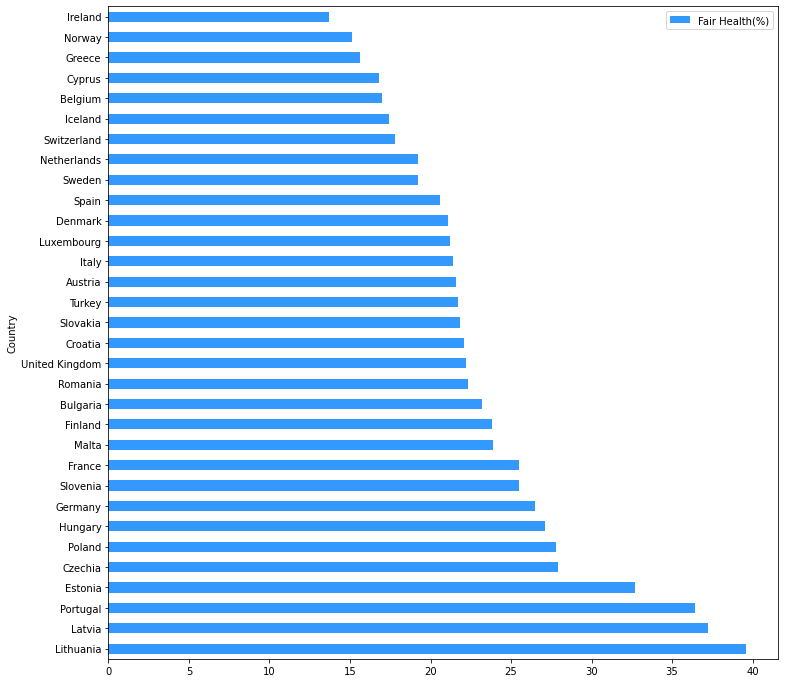

In [17]:
#Visualisasi negara dengan kondisi kesehatan yang baik dengan menggunakan diagram batang
fair.plot.barh(x='Country', y='Fair Health(%)', figsize=(12,12), color='#3399FF')

Dari hasil analisa data negara yang memiliki kondisi kesehatan yang baik, diperoleh informasi bahwa negara Lithuania memiliki presentase 39.6% penduduk yang memiliki kondisi kesehatan yang baik.


Negara dengan kondisi kesehatan penduduk yang buruk

In [18]:
#Kondisi kesehatan penduduk yang buruk
bad=health[['Country','Bad Health(%)']]
bad=bad.sort_values(by='Bad Health(%)', ascending=False, ignore_index=True)
bad.head(10)

,Country,Bad Health(%)
0,Croatia,14.8
1,Lithuania,14.2
2,Latvia,12.6
3,Estonia,12.5
4,Portugal,12.1
5,Poland,11.0
6,Hungary,10.4
7,Czechia,9.7
8,Slovakia,9.1
9,Bulgaria,8.7


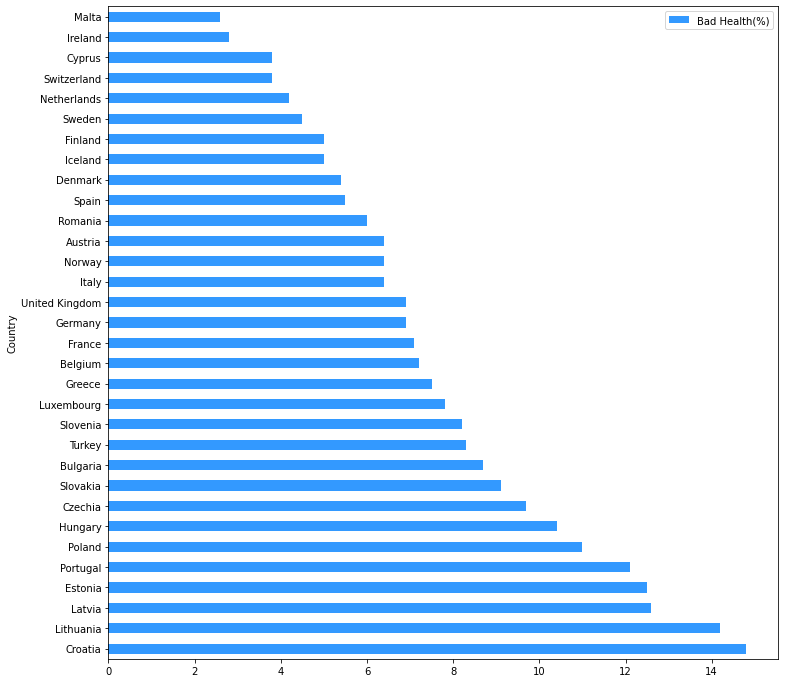

In [19]:
#Visualisasi negara dengan kondisi kesehatan yang buruk dengan menggunakan diagram batang
bad.plot.barh(x='Country', y='Bad Health(%)', figsize=(12,12), color='#3399FF')

Dari hasil analisa data negara yang memiliki kondisi kesehatan yang buruk, diperoleh informasi bahwa negara Croatia memiliki presentase 14.8% penduduk yang memiliki kondisi kesehatan yang buruk.

Negara dengan kondisi kesehatan penduduk yang sangat buruk

In [20]:
#Kondisi kesehatan penduduk yang sangat buruk
verybad=health[['Country','Very Bad Health(%)']]
verybad=verybad.sort_values(by='Very Bad Health(%)', ascending=False, ignore_index=True)
verybad.head(10)

,Country,Very Bad Health(%)
0,Croatia,3.8
1,Portugal,3.8
2,Latvia,3.0
3,Greece,2.8
4,Hungary,2.8
5,Poland,2.7
6,Lithuania,2.7
7,Slovakia,2.6
8,Bulgaria,2.3
9,Denmark,2.2


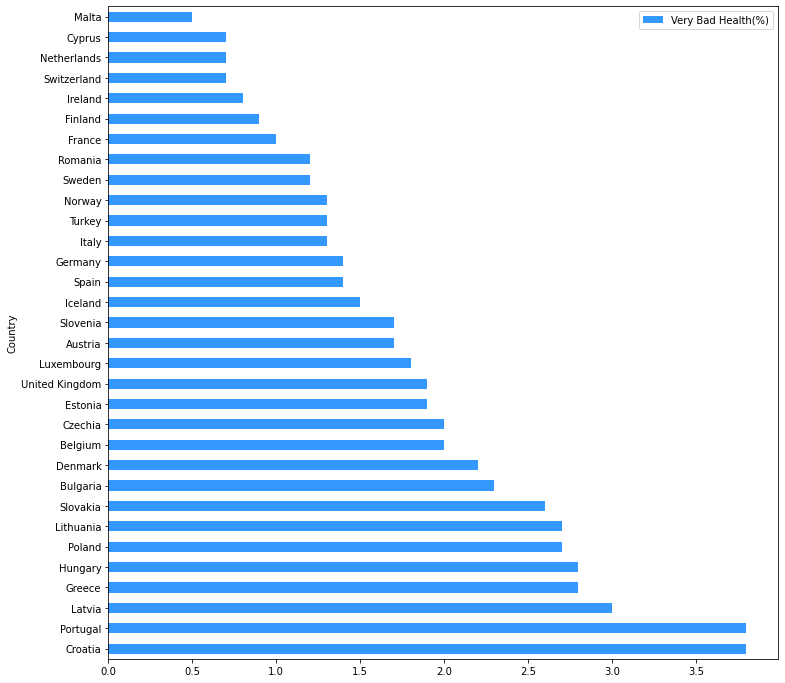

In [21]:
#Visualisasi negara dengan kondisi kesehatan yang sangat buruk dengan menggunakan diagram batang
verybad.plot.barh(x='Country', y='Very Bad Health(%)', figsize=(12,12), color='#3399FF')

Dari hasil analisa data negara yang memiliki kondisi kesehatan yang sangat buruk, diperoleh informasi bahwa negara Croatia memiliki presentase 3.8% penduduk yang memiliki kondisi kesehatan yang sangat buruk.

<h3> Kebahagiaan dalam Bekerja </h3>

In [22]:
#Kebahagiaan dalam bekerja di tiap negara
job_satisfication=df_europe[['Country','High Job Satisfication(%)',
       'Medium Job Satisfication(%)', 'Low Job Satisfication(%)']]
job_satisfication.head(10)

,Country,High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%)
0,Cyprus,28.2,51.8,20.0
1,Latvia,25.8,56.9,17.3
2,Lithuania,29.6,55.4,15.0
3,Luxembourg,30.4,55.1,14.5
4,Hungary,23.0,55.7,21.3
5,Malta,27.2,59.7,13.1
6,Netherlands,22.9,71.7,5.4
7,Austria,42.2,47.6,10.2
8,Poland,32.0,48.2,19.8
9,Portugal,24.5,50.4,25.1


In [23]:
#Negara dengan kebahagiaan dalam bekerja di level tertinggi
high_satisfication=job_satisfication[['Country', 'High Job Satisfication(%)']]
high_satisfication=high_satisfication.sort_values(by='High Job Satisfication(%)', ascending=False, ignore_index=True)
high_satisfication.head(10)

,Country,High Job Satisfication(%)
0,Denmark,44.4
1,Iceland,42.3
2,Austria,42.2
3,Finland,40.8
4,Norway,39.1
5,Switzerland,36.6
6,Sweden,34.5
7,Poland,32.0
8,Luxembourg,30.4
9,Lithuania,29.6


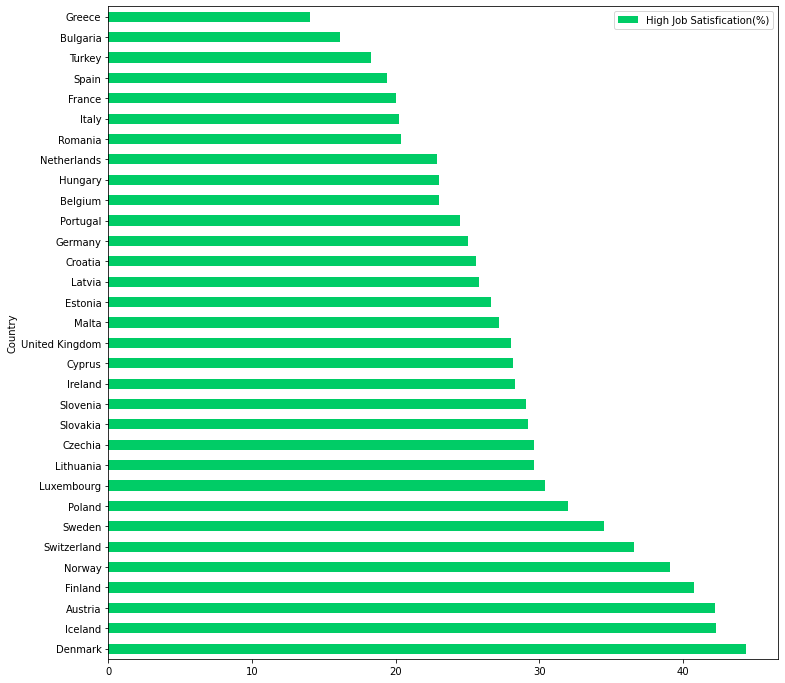

In [24]:
#Visualisasi negara dengan kebahagiaan dalam bekerja di level tertinggi dengan menggunakan diagram batang
high_satisfication.plot.barh(x='Country', y='High Job Satisfication(%)', figsize=(12,12), color='#00CC66')

Dari hasil analisa data negara yang memiliki kebahagiaan dalam bekerja di level tertinggi, diperoleh informasi bahwa negara Denmark memiliki presentase 44,4%.


In [25]:
#Negara dengan kebahagiaan dalam bekerja di level menengah
medium_satisfication=job_satisfication[['Country', 'Medium Job Satisfication(%)']]
medium_satisfication=medium_satisfication.sort_values(by='Medium Job Satisfication(%)', ascending=False, ignore_index=True)
medium_satisfication.head(10)

,Country,Medium Job Satisfication(%)
0,Netherlands,71.7
1,Belgium,68.5
2,France,64.7
3,Italy,62.2
4,Romania,61.6
5,Malta,59.7
6,Spain,59.1
7,Latvia,56.9
8,Hungary,55.7
9,Lithuania,55.4


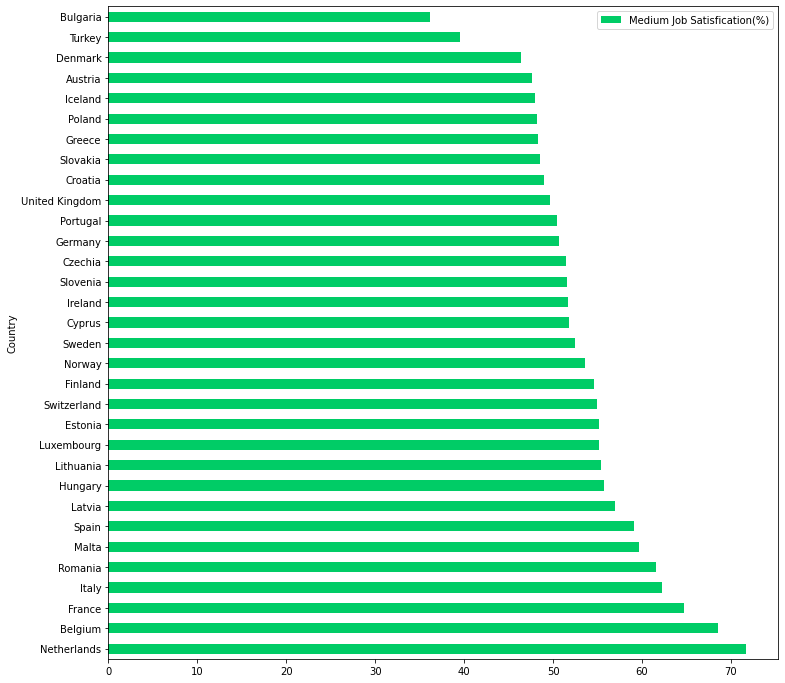

In [26]:
#Visualisasi negara dengan kebahagiaan dalam bekerja di level menengah dengan menggunakan diagram batang
medium_satisfication.plot.barh(x='Country', y='Medium Job Satisfication(%)', figsize=(12,12), color='#00CC66')

Dari hasil analisa data negara yang memiliki kebahagiaan dalam bekerja di level menengah, diperoleh informasi bahwa negara Netherlands memiliki presentase 71.7%.

In [27]:
##Negara dengan kebahagiaan dalam bekerja di level rendah
low_satisfication=job_satisfication[['Country', 'Low Job Satisfication(%)']]
low_satisfication=low_satisfication.sort_values(by='Low Job Satisfication(%)', ascending=False, ignore_index=True)
low_satisfication.head(10)

,Country,Low Job Satisfication(%)
0,Bulgaria,47.7
1,Turkey,42.2
2,Greece,37.7
3,Croatia,25.4
4,Portugal,25.1
5,Germany,24.3
6,United Kingdom,22.4
7,Slovakia,22.3
8,Spain,21.5
9,Hungary,21.3


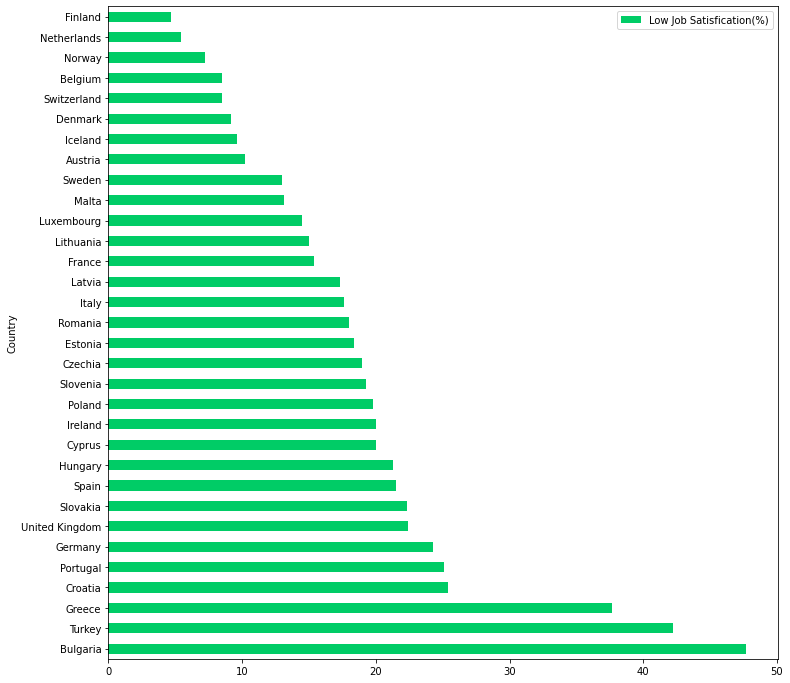

In [28]:
#Visualisasi negara dengan kebahagiaan dalam bekerja di level rendah dengan menggunakan diagram batang
low_satisfication.plot.barh(x='Country', y='Low Job Satisfication(%)', figsize=(12,12), color='#00CC66')

Dari hasil analisa data negara yang memiliki kebahagiaan dalam bekerja di level menengah, diperoleh informasi bahwa negara Bulgaria memiliki presentase 47.7%.

<h3> Kebahagiaan Hidup </h3>

In [30]:
#Negara dengan kebahagiaan hidup
life_satisfication=df_europe[['Country','High Life Satisfication(%)', 'Medium Life Satisfication(%)',
       'Low Life Satisfication(%)']]
life_satisfication.head(10)

,Country,High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%)
0,Cyprus,14.2,48.8,37.0
1,Latvia,12.6,56.6,30.8
2,Lithuania,18.8,53.3,27.9
3,Luxembourg,25.7,59.5,14.8
4,Hungary,11.3,50.2,38.5
5,Malta,21.9,57.7,20.4
6,Netherlands,26.1,68.3,5.6
7,Austria,37.9,49.3,12.9
8,Poland,29.4,50.7,19.9
9,Portugal,13.8,45.7,40.5


In [31]:
##Negara dengan kebahagiaan hidup di level tertinggi
hlife_satisfication=life_satisfication[['Country', 'High Life Satisfication(%)']]
hlife_satisfication=hlife_satisfication.sort_values(by='High Life Satisfication(%)', ascending=False, ignore_index=True)
hlife_satisfication.head(10)

,Country,High Life Satisfication(%)
0,Denmark,42.7
1,Finland,38.6
2,Switzerland,38.5
3,Iceland,38.1
4,Austria,37.9
5,Norway,35.6
6,Sweden,34.4
7,Ireland,30.6
8,Poland,29.4
9,United Kingdom,27.8


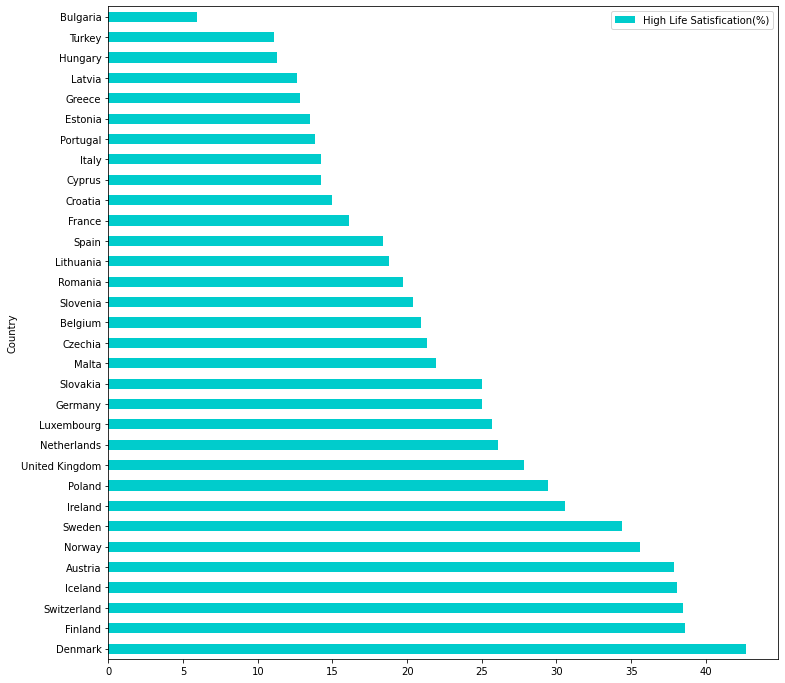

In [32]:
#Visualisasi negara dengan kebahagiaan hidup di level tertinggi dengan menggunakan diagram batang
hlife_satisfication.plot.barh(x='Country', y='High Life Satisfication(%)', figsize=(12,12), color='#00CCCC')

Dari hasil analisa data negara yang memiliki kebahagiaan hidup di level tertinggi, diperoleh informasi bahwa negara Denmark memiliki presentase 42.7%.


In [33]:
#Negara dengan kebahagiaan hidup di level menengah
mlife_satisfication=life_satisfication[['Country', 'Medium Life Satisfication(%)']]
mlife_satisfication=mlife_satisfication.sort_values(by='Medium Life Satisfication(%)', ascending=False, ignore_index=True)
mlife_satisfication.head(10)

,Country,Medium Life Satisfication(%)
0,Belgium,69.9
1,Netherlands,68.3
2,France,64.8
3,Romania,63.7
4,Italy,63.0
5,Luxembourg,59.5
6,Spain,58.4
7,Malta,57.7
8,Latvia,56.6
9,Sweden,56.6


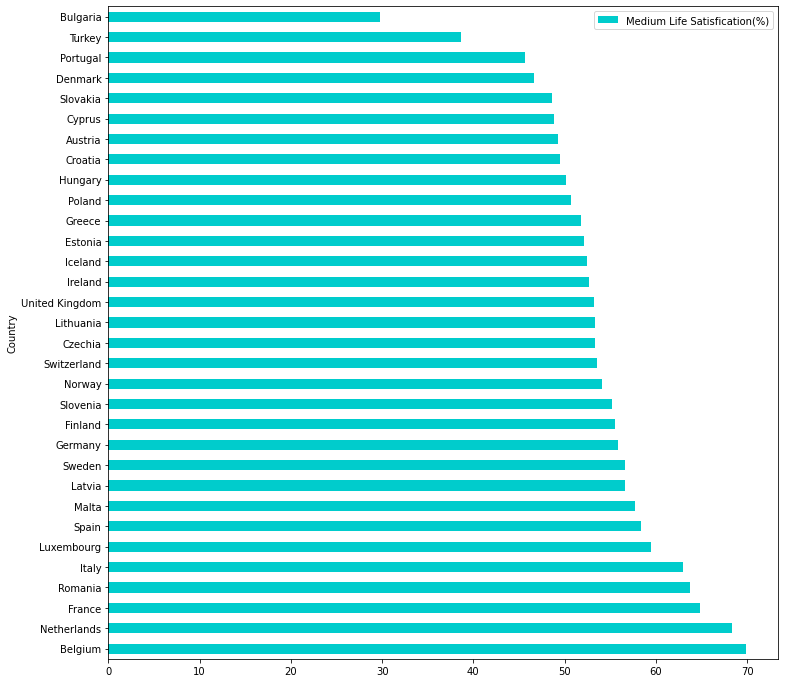

In [34]:
#Visualisasi negara dengan kebahagiaan hidup di level menengah dengan menggunakan diagram batang
mlife_satisfication.plot.barh(x='Country', y='Medium Life Satisfication(%)', figsize=(12,12), color='#00CCCC')

Dari hasil analisa data negara yang memiliki kebahagiaan hidup di level menengah, diperoleh informasi bahwa negara Belgia memiliki presentase 69.9%.


In [35]:
#Negara dengan kebahagiaan hidup di level rendah
llife_satisfication=life_satisfication[['Country', 'Low Life Satisfication(%)']]
llife_satisfication=llife_satisfication.sort_values(by='Low Life Satisfication(%)', ascending=False, ignore_index=True)
llife_satisfication.head(10)

,Country,Low Life Satisfication(%)
0,Bulgaria,64.2
1,Turkey,50.3
2,Portugal,40.5
3,Hungary,38.5
4,Cyprus,37.0
5,Greece,35.5
6,Croatia,35.4
7,Estonia,34.4
8,Latvia,30.8
9,Lithuania,27.9


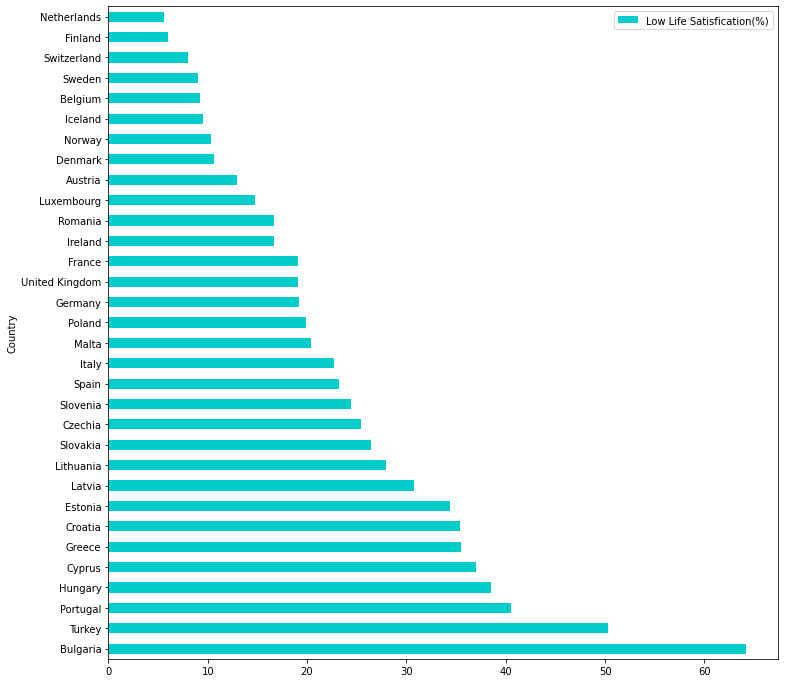

In [36]:
#Visualisasi negara dengan kebahagiaan hidup di level rendah dengan menggunakan diagram batang
llife_satisfication.plot.barh(x='Country', y='Low Life Satisfication(%)', figsize=(12,12), color='#00CCCC')

Dari hasil analisa data negara yang memiliki kebahagiaan hidup di level rendah, diperoleh informasi bahwa negara Bulgaria memiliki presentase 64.2%.

<h3> Rata-rata Pendapatan </h3>

In [37]:
#Negara dengan Rata-rata Pendapatan
median_income=df_europe[['Country','Median Income']]
median_income=median_income.sort_values(by='Median Income', ascending=False, ignore_index=True)
median_income.head(10)

,Country,Median Income
0,Luxembourg,28663
1,Switzerland,27692
2,Norway,27670
3,Austria,23071
4,Iceland,22193
5,Denmark,21355
6,Belgium,21335
7,Netherlands,21189
8,Germany,21152
9,Sweden,20955


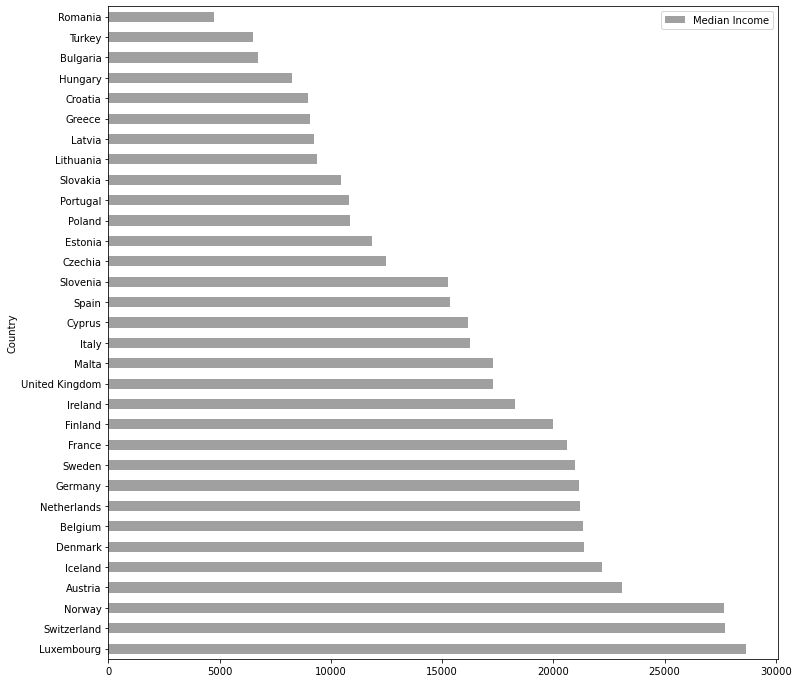

In [38]:
#Visualisasi Rata-rata pendapatan di tiap negara dengan menggunakan diagram batang
median_income.plot.barh(x='Country', y='Median Income', figsize=(12,12), color='#A0A0A0')

<h3> Penduduk Belum Bekerja </h3>

In [103]:
#Negara dengan presentase penduduk yang belum bekerja atau pengangguran dalam presentase
unemployment=df_europe[['Country','Unemployment Rate(%)','Total Population']]
unemployment.head(10)

,Country,Unemployment Rate(%),Total Population
0,Cyprus,13.0,840407
1,Latvia,9.6,2070371
2,Lithuania,7.9,3043429
3,Luxembourg,6.3,512353
4,Hungary,5.1,9937628
5,Malta,4.7,417432
6,Netherlands,6.0,16655799
7,Austria,6.0,8401940
8,Poland,6.2,38044565
9,Portugal,11.2,10562178


In [107]:
#Total penduduk yang belum bekerja di setiap negara
unemployment['Total Unemployment']=unemployment['Unemployment Rate(%)']*unemployment['Total Population']*0.01
unemployment['Total Unemployment']=unemployment['Total Unemployment'].astype('int')
unemployment=unemployment.sort_values(by='Total Unemployment', ascending=False, ignore_index=True)
unemployment.head(10)

<ipython-input-107-2c604c013d14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment['Total Unemployment']=unemployment['Unemployment Rate(%)']*unemployment['Total Population']*0.01
<ipython-input-107-2c604c013d14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment['Total Unemployment']=unemployment['Total Unemployment'].astype('int')


,Country,Unemployment Rate(%),Total Population,Total Unemployment
0,Spain,19.6,46815910,9175918
1,Italy,11.7,59433744,6953748
2,France,10.1,64933400,6558273
3,Germany,4.1,80219695,3289007
4,United Kingdom,4.8,63182180,3032744
5,Greece,23.6,10816286,2552643
6,Poland,6.2,38044565,2358763
7,Romania,5.9,20121641,1187176
8,Portugal,11.2,10562178,1182963
9,Netherlands,6.0,16655799,999347


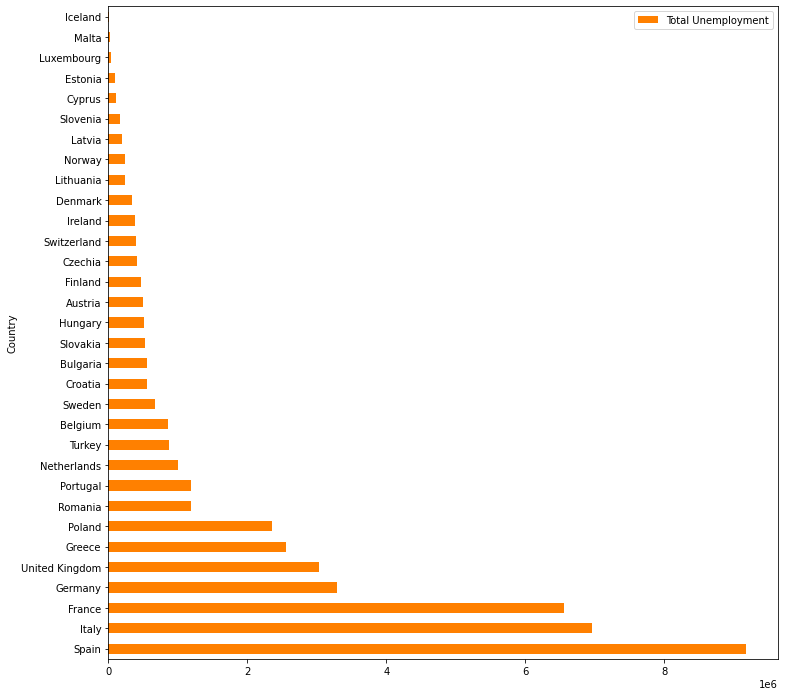

In [115]:
#Visualisasi negara dengan penduduk yang belum bekerja dengan menggunakan diagram batang
unemployment.plot.barh(x='Country', y='Total Unemployment', figsize=(12,12), color='#FF8000')

Dari hasil analisa data negara yang memiliki penduduk yang belum bekerja, diperoleh informasi bahwa negara Spain memiliki sebanyak 9.175.918 penduduk.


<h3> Populasi Remaja </h3>

In [111]:
#Negara dengan populasi remaja dalam presentase
young_population=df_europe[['Country','Total Population','Young Adult Population(%)']]
young_population.head(10)

,Country,Total Population,Young Adult Population(%)
0,Cyprus,840407,23.322628
1,Latvia,2070371,20.442858
2,Lithuania,3043429,20.526781
3,Luxembourg,512353,18.940652
4,Hungary,9937628,18.345122
5,Malta,417432,20.590659
6,Netherlands,16655799,18.269979
7,Austria,8401940,18.677544
8,Poland,38044565,21.915808
9,Portugal,10562178,17.074045


In [112]:
#Total populasi remaja di setiap negara
young_population['Total Young Population']=young_population['Total Population']*young_population['Young Adult Population(%)']*0.01
young_population['Young Adult Population(%)']=young_population['Young Adult Population(%)'].astype('int')
young_population['Total Young Population']=young_population['Total Young Population'].astype('int')
young_population=young_population.sort_values(by='Total Young Population', ascending=False, ignore_index=True)
young_population.head(10)

<ipython-input-112-94f55a48d40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_population['Total Young Population']=young_population['Total Population']*young_population['Young Adult Population(%)']*0.01
<ipython-input-112-94f55a48d40a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_population['Young Adult Population(%)']=young_population['Young Adult Population(%)'].astype('int')
<ipython-input-112-94f55a48d40a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Country,Total Population,Young Adult Population(%),Total Young Population
0,Germany,80219695,17,13722051
1,United Kingdom,63182180,19,12599989
2,France,64933400,18,12030535
3,Italy,59433744,15,9197355
4,Poland,38044565,21,8337773
5,Spain,46815910,16,7806239
6,Romania,20121641,18,3777904
7,Netherlands,16655799,18,3043011
8,Belgium,11000638,18,2033484
9,Czechia,10436560,18,1968595


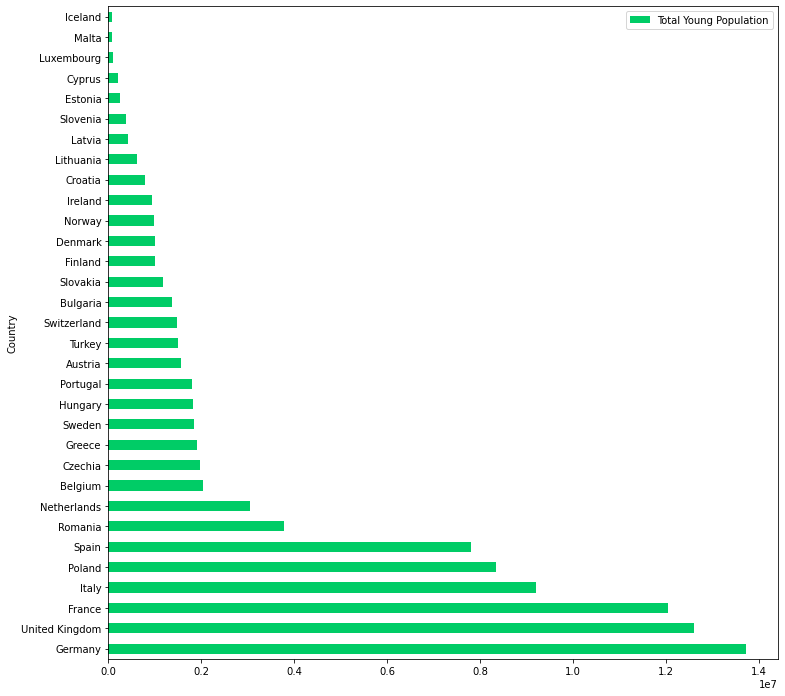

In [119]:
#Visualisasi populasi remaja di setiap negara menggunakan diagram batang
young_population.plot.barh(x='Country', y='Total Young Population', figsize=(12,12), color='#00CC66')

Dari hasil analisa data populasi remaja di setiap negara, diperoleh informasi bahwa negara Germany memiliki 13.722.051 penduduk yang masih remaja.


In [114]:
#dataset final
europe_final=pd.concat([df_europe,df_unemployment['Total Unemployment'],young_population['Total Young Population']],axis=1 )
europe_final['Young Adult Population(%)']=europe_final['Young Adult Population(%)'].astype('int')
europe_final.head(10)

,Country,GDP(US$),High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),Median Income,Very Good Health(%),Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%),Unemployment Rate(%),Average Hours Worked(Hours),Total Population,Young Adult Population(%),Total Unemployment,Total Young Population
0,Cyprus,18490.2,28.2,51.8,20.0,14.2,48.8,37.0,16173,44.1,34.6,16.8,3.8,0.7,13.0,39.2,840407,23,109252,13722051
1,Latvia,25037.7,25.8,56.9,17.3,12.6,56.6,30.8,9257,5.1,42.1,37.2,12.6,3.0,9.6,38.7,2070371,20,198755,12599989
2,Lithuania,38849.4,29.6,55.4,15.0,18.8,53.3,27.9,9364,6.6,36.8,39.6,14.2,2.7,7.9,38.5,3043429,20,240430,12030535
3,Luxembourg,53303.0,30.4,55.1,14.5,25.7,59.5,14.8,28663,23.4,45.8,21.2,7.8,1.8,6.3,37.5,512353,18,32278,9197355
4,Hungary,113903.8,23.0,55.7,21.3,11.3,50.2,38.5,8267,17.6,42.0,27.1,10.4,2.8,5.1,39.7,9937628,18,506819,8337773
5,Malta,10344.1,27.2,59.7,13.1,21.9,57.7,20.4,17264,22.3,50.6,23.9,2.6,0.5,4.7,38.7,417432,20,19619,7806239
6,Netherlands,708337.0,22.9,71.7,5.4,26.1,68.3,5.6,21189,22.5,53.4,19.2,4.2,0.7,6.0,30.3,16655799,18,999347,3777904
7,Austria,356237.6,42.2,47.6,10.2,37.9,49.3,12.9,23071,31.9,38.3,21.6,6.4,1.7,6.0,36.5,8401940,18,504116,3043011
8,Poland,426547.5,32.0,48.2,19.8,29.4,50.7,19.9,10865,15.9,42.7,27.8,11.0,2.7,6.2,40.7,38044565,21,2358763,2033484
9,Portugal,186480.5,24.5,50.4,25.1,13.8,45.7,40.5,10805,8.7,39.0,36.4,12.1,3.8,11.2,39.4,10562178,17,1182963,1968595


<h1>Visualisasi Data</h1>

Pada visualisasi ini akan menampilkan korelasi dari variabel Job Satisfication, Life Satisfication dan Health Condition dari tiap-tiap negara

In [40]:
#import library seaborn
import seaborn as sns

<h4>Job Satisfication dan Life Satisfication</h4>

In [155]:
#Korelasi antara Job Satisfication dan Life Satisfication
job_life=europe_final[['High Job Satisfication(%)',
       'Medium Job Satisfication(%)', 'Low Job Satisfication(%)',
       'High Life Satisfication(%)', 'Medium Life Satisfication(%)',
       'Low Life Satisfication(%)']]
job_life.head()

,High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%)
0,28.2,51.8,20.0,14.2,48.8,37.0
1,25.8,56.9,17.3,12.6,56.6,30.8
2,29.6,55.4,15.0,18.8,53.3,27.9
3,30.4,55.1,14.5,25.7,59.5,14.8
4,23.0,55.7,21.3,11.3,50.2,38.5


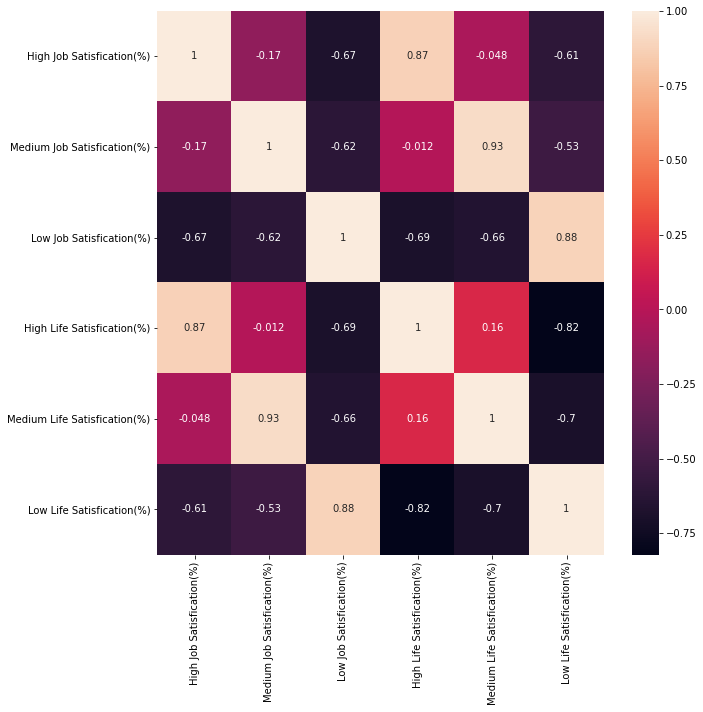

In [140]:
#Visualisasi menggunakan diagram heatmap
plt.figure(figsize=(10,10))
sns.heatmap(job_life.corr(), annot=True)
plt.show()

Dari analisa korelasi antara Job Satisfication dan Life Satisfication didapatkan korelasi yang bermacam-macam. Nilai korelasi dianggap kuat atau bagus apabila nilai korelasi mendekati 1 dan apabila memiliki nilai korelasi tidak mendekati 1 maka tidak memiliki korelasi yang bagus. Variabel yang memiliki korelasi yang bagus antara Medium Job Satisfication dan Medium Life Job Satisfication, menunjukkan bahwa di negara benua eropa jika penduduk dengan level menengah, jika mereka memiliki kebahagiaan di lingkup kerja maka mereka juga bahagia dalam hidupnya.

<h4>Life Satisfication dan Health Condition</h4>

In [149]:
#Korelasi antara Life Satisfication dan Health Condition
life_health=europe_final[['High Life Satisfication(%)', 'Medium Life Satisfication(%)',
       'Low Life Satisfication(%)','Very Good Health(%)',
       'Good Health(%)', 'Fair Health(%)', 'Bad Health(%)',
       'Very Bad Health(%)' ]]
life_health.head()

,High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),Very Good Health(%),Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%)
0,14.2,48.8,37.0,44.1,34.6,16.8,3.8,0.7
1,12.6,56.6,30.8,5.1,42.1,37.2,12.6,3.0
2,18.8,53.3,27.9,6.6,36.8,39.6,14.2,2.7
3,25.7,59.5,14.8,23.4,45.8,21.2,7.8,1.8
4,11.3,50.2,38.5,17.6,42.0,27.1,10.4,2.8


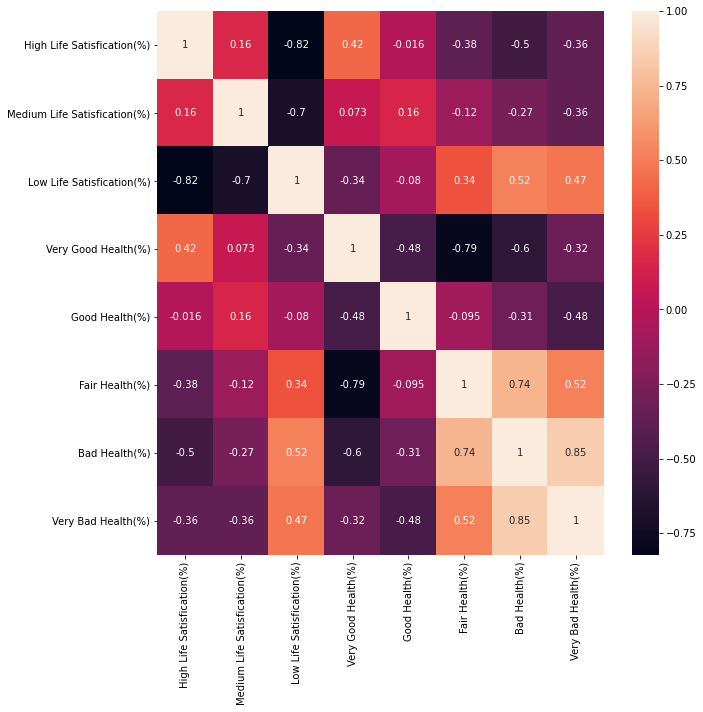

In [150]:
#Visualisasi menggunakan diagram heatmap
plt.figure(figsize=(10,10))
sns.heatmap(life_health.corr(), annot=True)
plt.show()

Pada analisa korelasi antara Life Satisfication dan Health Condition dapat diperoleh informasi apabila mereka kurang bahagia dalam hidupnya maka akan berpengaruh pada kesehatan dapat dibuktikan dengan nilai korelasi tertinggi didapatkan sebesar 0.52. Meskipun nilai korelasinya tidak mendekati 1, akan tetapi sudah dapat dijadikan sebagai refrensi untuk korelasi dari kedua variabel ini.

<h4> High Job Satisfication and High Life Satisfication </h4>

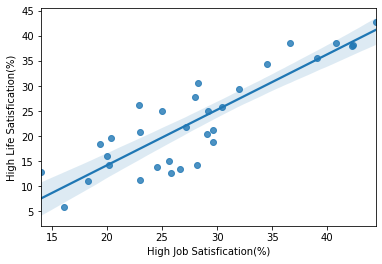

In [41]:
#Visualisasi data High Job Satisfication dan High Life Satisfication menggunakan Regression Plot
sns.regplot(x='High Job Satisfication(%)', y='High Life Satisfication(%)', data=df_europe)

In [42]:
#Nilai korelasi antara High Job Satisfication dan High Life Satisfication
df_europe[['High Job Satisfication(%)','High Life Satisfication(%)']].corr()

,High Job Satisfication(%),High Life Satisfication(%)
High Job Satisfication(%),1.000000,0.873831
High Life Satisfication(%),0.873831,1.000000


<h4>Medium Job Satisfication and Medium Life Satisfiaction</h4>

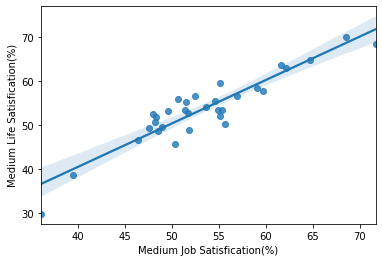

In [44]:
#Visualisasi data Medium Job Satisfication dan Medium Life Satisfication menggunakan Regression Plot
sns.regplot(x='Medium Job Satisfication(%)', y='Medium Life Satisfication(%)', data=df_europe)

In [45]:
#Nilai Korelasi antara Medium Job Satisfication dan Medium Life Satisfication
df_europe[['Medium Job Satisfication(%)','Medium Life Satisfication(%)']].corr()

,Medium Job Satisfication(%),Medium Life Satisfication(%)
Medium Job Satisfication(%),1.000000,0.925987
Medium Life Satisfication(%),0.925987,1.000000


<h4>Low Job Satisfication and Low Life Satisfication</h4>

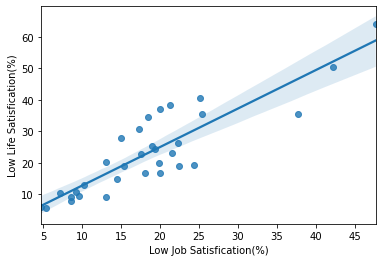

In [46]:
#Visualisasi Low Job Satisfication dan Low Life Satisfication menggunakan Regression Plot
sns.regplot(x='Low Job Satisfication(%)', y='Low Life Satisfication(%)', data=df_europe)

In [47]:
#Nilai korelasi antara Low Job Satisfication dan Low Life Satisfication
df_europe[['Low Job Satisfication(%)','Low Life Satisfication(%)']].corr()

,Low Job Satisfication(%),Low Life Satisfication(%)
Low Job Satisfication(%),1.000000,0.880748
Low Life Satisfication(%),0.880748,1.000000


<h1> Pemodelan Data </h1>

Pada analisa ini akan digunakan descriptive modelling yaitu K-Means Clustering dengan tujuan untuk mengetahui negara mana yang memiliki kondisi atau keadaan lebih bagus dari tiap-tiap negara di eropa. Untuk mengetahui berapa klaster yang terbaik dari data ini, digunakan 2 methode antara lain:
1. Elbow Method atau Metode siku untuk menentukan berapa klaster yang dipakai. Elbow Method atau metode siku adalah sebuah metode yang menggunakan garis patahan yang membentuk siku, dari potongan tersebut menunjukkan jumlah klaster terbaik untuk digunakan pada suatu data.

2. Lalu menggunakan menggunakan Sillhouete methode yaitu metode interpretasi dan validasi konsistensi dalam kelompok data. Teknik ini menyediakan representasi grafis singkat tentang seberapa baik setiap objek telah diklasifikasikan. Nilai siluet adalah ukuran seberapa mirip suatu objek dengan kelompoknya sendiri dibandingkan dengan kelompok lainnya.

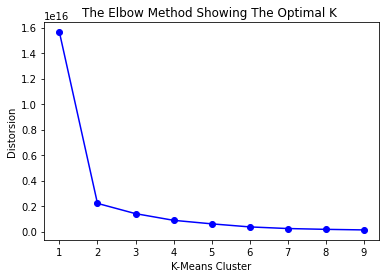

In [157]:
#import library yang digunakan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#data yang akan digunakan sebagai data klastering
data=europe_final
data=europe_final.drop('Country',1)

#mencari nilai distorsi dan menggunakan range nilai 1-10 sebagai nilai klaster
distorsion=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel=kmeanModel.fit(data)
    distorsion.append(kmeanModel.inertia_)
    
#visualisasi elbow method
plt.plot(K, distorsion,'bo-')
plt.xlabel('K-Means Cluster')
plt.ylabel('Distorsion')
plt.title('The Elbow Method Showing The Optimal K ')
plt.show()

Dari grafik Elbow method titik siku terdapat pada nilai 2, yang berarti jumlah klaster terbaik untuk data ini adalah 2 klaster

In [158]:
#menginisiasi nilai Silhouette untuk menentukan jumlah klaster
for n_clusters in range(2,10): 
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) 
    cluster_labels=clusterer.fit_predict(data)
    silhouette_avg=silhouette_score(data,cluster_labels)
    print("Cluster n:",n_clusters,"Clusters,",
          "Average Silhouette: ",
          round(silhouette_avg,3))
    sample_silhouette_values=silhouette_samples(data
                                                ,cluster_labels)

Cluster n: 2 Clusters, Average Silhouette:  0.802
Cluster n: 3 Clusters, Average Silhouette:  0.73
Cluster n: 4 Clusters, Average Silhouette:  0.543
Cluster n: 5 Clusters, Average Silhouette:  0.484
Cluster n: 6 Clusters, Average Silhouette:  0.478
Cluster n: 7 Clusters, Average Silhouette:  0.523
Cluster n: 8 Clusters, Average Silhouette:  0.496
Cluster n: 9 Clusters, Average Silhouette:  0.499


Pada nilai Sillhouette method didapat nilai yang bermacam-macam, karena hanya memakai range nilai 1-10 maka dimulai dari nilai 2 karena klaster minimal berjumlah 2, lalu nilai akhirnya adalah 9. Jika dilihat jumlah klaster 2 mendapatkan nilai 0.802, nilai ini terbaik daripada nilai klaster lainnya. Dari hasil ini bisa dipastikan bahwa jumlah klaster terbaik untuk data ini berjumlah 2 klaster.

In [121]:
#mengatur nilai klaster dan memasukkan data kedalam model K-Means 
Kmeans=KMeans(n_clusters=2)
Kmeans=Kmeans.fit(data)

#dari data ini yang digunakan hanya data berbentuk angka
data_columns=list(data.columns.values)
country=europe_final.iloc[:,0]

#mengatur nilai centroid
center=Kmeans.cluster_centers_
labels=Kmeans.labels_

#menampilkan hasil setelah diklaster secara rara-rata dari tiap variabel yang ada dalam data
center=pd.DataFrame(center, columns=data_columns)
center.insert(0,'Cluster', [1,2])
(center.T).round(2)

,0,1
Cluster,1.00,2.00
GDP(US$),1837802.52,218148.08
High Job Satisfication(%),24.10,28.91
Medium Job Satisfication(%),55.75,52.90
Low Job Satisfication(%),20.17,18.18
High Life Satisfication(%),21.82,23.32
Medium Life Satisfication(%),57.65,52.82
Low Life Satisfication(%),20.53,23.86
Median Income,16919.67,15753.73
Very Good Health(%),18.78,23.96


In [122]:
#mengintepretasikan hasil klaster kedalam data
country_cluster={'Country':country, 'Cluster':labels}
country_cluster=pd.DataFrame(country_cluster, columns=['Country','Cluster'])
country_cluster

,Country,Cluster
0,Cyprus,1
1,Latvia,1
2,Lithuania,1
3,Luxembourg,1
4,Hungary,1
5,Malta,1
6,Netherlands,1
7,Austria,1
8,Poland,0
9,Portugal,1


In [156]:
#hasil data setelah dilakukan klaster
result=pd.concat([country_cluster.reset_index(drop=True), europe_final], axis=1)
result.head(10)

,Country,Cluster,Country,GDP(US$),High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),...,Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%),Unemployment Rate(%),Average Hours Worked(Hours),Total Population,Young Adult Population(%),Total Unemployment,Total Young Population
0,Cyprus,1,Cyprus,18490.2,28.2,51.8,20.0,14.2,48.8,37.0,...,34.6,16.8,3.8,0.7,13.0,39.2,840407,23,109252,13722051
1,Latvia,1,Latvia,25037.7,25.8,56.9,17.3,12.6,56.6,30.8,...,42.1,37.2,12.6,3.0,9.6,38.7,2070371,20,198755,12599989
2,Lithuania,1,Lithuania,38849.4,29.6,55.4,15.0,18.8,53.3,27.9,...,36.8,39.6,14.2,2.7,7.9,38.5,3043429,20,240430,12030535
3,Luxembourg,1,Luxembourg,53303.0,30.4,55.1,14.5,25.7,59.5,14.8,...,45.8,21.2,7.8,1.8,6.3,37.5,512353,18,32278,9197355
4,Hungary,1,Hungary,113903.8,23.0,55.7,21.3,11.3,50.2,38.5,...,42.0,27.1,10.4,2.8,5.1,39.7,9937628,18,506819,8337773
5,Malta,1,Malta,10344.1,27.2,59.7,13.1,21.9,57.7,20.4,...,50.6,23.9,2.6,0.5,4.7,38.7,417432,20,19619,7806239
6,Netherlands,1,Netherlands,708337.0,22.9,71.7,5.4,26.1,68.3,5.6,...,53.4,19.2,4.2,0.7,6.0,30.3,16655799,18,999347,3777904
7,Austria,1,Austria,356237.6,42.2,47.6,10.2,37.9,49.3,12.9,...,38.3,21.6,6.4,1.7,6.0,36.5,8401940,18,504116,3043011
8,Poland,0,Poland,426547.5,32.0,48.2,19.8,29.4,50.7,19.9,...,42.7,27.8,11.0,2.7,6.2,40.7,38044565,21,2358763,2033484
9,Portugal,1,Portugal,186480.5,24.5,50.4,25.1,13.8,45.7,40.5,...,39.0,36.4,12.1,3.8,11.2,39.4,10562178,17,1182963,1968595


In [125]:
#negara yang masuk pada klaster 0
cluster_0=result[result.Cluster==0]
cluster_0

,Country,Cluster,Country,GDP(US$),High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),...,Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%),Unemployment Rate(%),Average Hours Worked(Hours),Total Population,Young Adult Population(%),Total Unemployment,Total Young Population
8,Poland,0,Poland,426547.5,32.0,48.2,19.8,29.4,50.7,19.9,...,42.7,27.8,11.0,2.7,6.2,40.7,38044565,21,2358763,2033484
15,United Kingdom,0,United Kingdom,2403382.6,28.0,49.6,22.4,27.8,53.2,19.1,...,38.1,22.2,6.9,1.9,4.8,36.6,63182180,19,3032744,1488632
24,Germany,0,Germany,3159750.0,25.0,50.7,24.3,25.0,55.8,19.2,...,47.2,26.5,6.9,1.4,4.1,35.1,80219695,17,3289007,624717
28,Spain,0,Spain,1118743.0,19.4,59.1,21.5,18.4,58.4,23.2,...,56.9,20.6,5.5,1.4,19.6,37.7,46815910,16,9175918,196005
29,France,0,France,2228568.0,20.0,64.7,15.4,16.1,64.8,19.1,...,44.5,25.5,7.1,1.0,10.1,37.3,64933400,18,6558273,97042
31,Italy,0,Italy,1689824.0,20.2,62.2,17.6,14.2,63.0,22.7,...,60.4,21.4,6.4,1.3,11.7,37.0,59433744,15,6953748,68139


Pada negara klaster 0, dapat disimpulkan bahwa negara tersebut memiliki kondisi atau keadaan diatas rata-rata diantara negara lain di Eropa. 

In [126]:
#negara pada klaster 1
cluster_1=result[result.Cluster==1]
cluster_1

,Country,Cluster,Country,GDP(US$),High Job Satisfication(%),Medium Job Satisfication(%),Low Job Satisfication(%),High Life Satisfication(%),Medium Life Satisfication(%),Low Life Satisfication(%),...,Good Health(%),Fair Health(%),Bad Health(%),Very Bad Health(%),Unemployment Rate(%),Average Hours Worked(Hours),Total Population,Young Adult Population(%),Total Unemployment,Total Young Population
0,Cyprus,1,Cyprus,18490.2,28.2,51.8,20.0,14.2,48.8,37.0,...,34.6,16.8,3.8,0.7,13.0,39.2,840407,23,109252,13722051
1,Latvia,1,Latvia,25037.7,25.8,56.9,17.3,12.6,56.6,30.8,...,42.1,37.2,12.6,3.0,9.6,38.7,2070371,20,198755,12599989
2,Lithuania,1,Lithuania,38849.4,29.6,55.4,15.0,18.8,53.3,27.9,...,36.8,39.6,14.2,2.7,7.9,38.5,3043429,20,240430,12030535
3,Luxembourg,1,Luxembourg,53303.0,30.4,55.1,14.5,25.7,59.5,14.8,...,45.8,21.2,7.8,1.8,6.3,37.5,512353,18,32278,9197355
4,Hungary,1,Hungary,113903.8,23.0,55.7,21.3,11.3,50.2,38.5,...,42.0,27.1,10.4,2.8,5.1,39.7,9937628,18,506819,8337773
5,Malta,1,Malta,10344.1,27.2,59.7,13.1,21.9,57.7,20.4,...,50.6,23.9,2.6,0.5,4.7,38.7,417432,20,19619,7806239
6,Netherlands,1,Netherlands,708337.0,22.9,71.7,5.4,26.1,68.3,5.6,...,53.4,19.2,4.2,0.7,6.0,30.3,16655799,18,999347,3777904
7,Austria,1,Austria,356237.6,42.2,47.6,10.2,37.9,49.3,12.9,...,38.3,21.6,6.4,1.7,6.0,36.5,8401940,18,504116,3043011
9,Portugal,1,Portugal,186480.5,24.5,50.4,25.1,13.8,45.7,40.5,...,39.0,36.4,12.1,3.8,11.2,39.4,10562178,17,1182963,1968595
10,Romania,1,Romania,170393.6,20.4,61.6,18.0,19.7,63.7,16.7,...,43.9,22.3,6.0,1.2,5.9,39.9,20121641,18,1187176,1904143


Negara yang tedapat pada klaster 2 merupakan negara yang memiliki keadaan atau kondisi yang tidak jauh dari rata-rata negara lainnya.